In [57]:
import network3
import numpy as np
import matplotlib.pyplot as plt
from network3 import Network, ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer # softmax plus log-likelihood cost is more common in modern image classification networks.

In [95]:
training_data, validation_data, test_data = network3.load_data_shared()
# mini-batch size:
mini_batch_size = 10

In [79]:
from network3 import ReLU
net = Network([
    ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28),
                  filter_shape=(20, 1, 5, 5),
                  poolsize=(2, 2),
                  activation_fn=ReLU),
    ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12),
                  filter_shape=(40, 20, 5, 5),
                  poolsize=(2, 2),
                  activation_fn=ReLU),
    FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 1, mini_batch_size, 0.03, validation_data, test_data, lmbda=0.1)

Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 96.64%
This is the best validation accuracy to date.
The corresponding test accuracy is 96.94%
Finished training network.
Best validation accuracy of 96.64% obtained at iteration 4999
Corresponding test accuracy of 96.94%


In [132]:
test_x, test_y = test_data
test_y

Elemwise{Cast{int32}}.0

In [134]:
test_y[10*10: (10+1)*10].eval()

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-5.10-microsoft-standard-WSL2-x86_64-with-debian-9.12--2.7.18-64/lock_dir/lock


array([6, 0, 5, 4, 9, 9, 2, 1, 9, 4], dtype=int32)

In [139]:
test_accuracies = []
for i in range (0, mini_batch_size+1):
    predictions = net.test_mb_predictions(i)
    predictions = np.array(predictions)
    test_accuracy = []
    
    test_y2 = test_y[i*10: (i+1)*10].eval()
    
    for j in range(0, len(predictions)):
        print("test_y[j]", test_y2[j], " predictions ", predictions, "predictions[j] ", predictions[j])
        test_accuracy.append(test_y2[j] == predictions[j])

    test_accuracy = np.mean(test_accuracy)
    test_accuracies.append(test_accuracy * 100)

('test_y[j]', 7, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 7)
('test_y[j]', 2, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 2)
('test_y[j]', 1, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 1)
('test_y[j]', 0, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 0)
('test_y[j]', 4, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 4)
('test_y[j]', 1, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 1)
('test_y[j]', 4, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 4)
('test_y[j]', 9, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 9)
('test_y[j]', 5, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 6)
('test_y[j]', 9, ' predictions ', array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), 'predictions[j] ', 9)
('test_y[j]', 0, ' predictions ', array([0, 6, 9, 

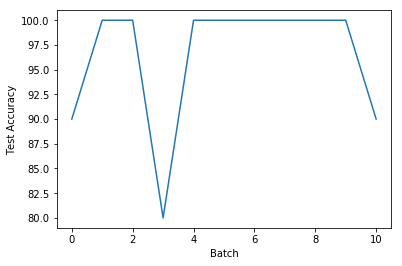

In [136]:
plt.plot(test_accuracies)
plt.xlabel('Batch')
plt.ylabel('Test Accuracy')
plt.show()

In [137]:
test_accuracies

[90.0, 100.0, 100.0, 80.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 90.0]

In [138]:
np.mean(test_accuracies)

96.36363636363636